In [7]:
%pylab inline
rcParams['font.size']=18
rcParams['figure.figsize']=(12,6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = np.load('/data/detectors/2015-07-20_222513_sweep.npz')

In [3]:
d.keys()

['freq', 'data', 'epoch']

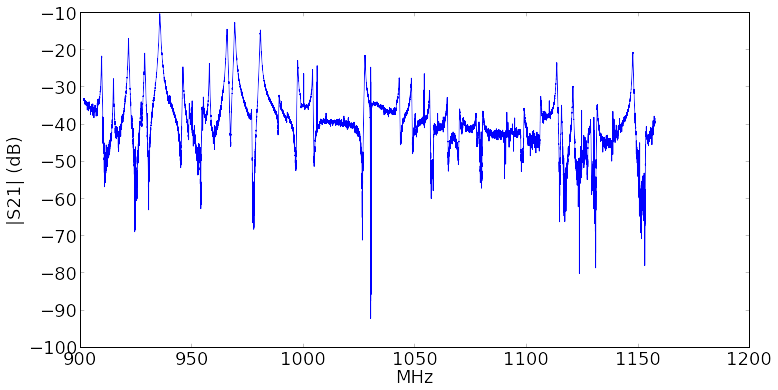

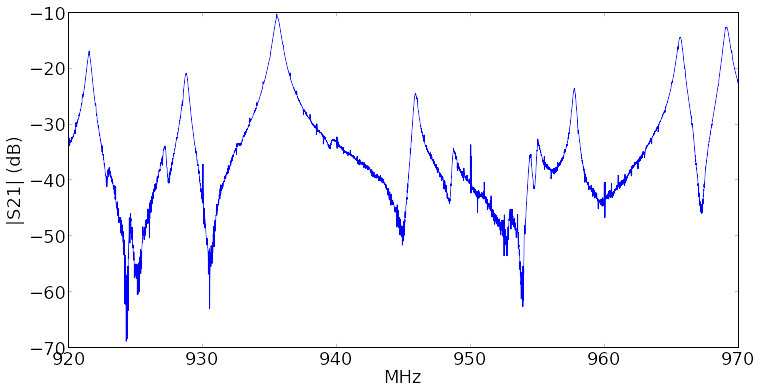

In [11]:
figure()
plot(d['freq'],20*np.log10(np.abs(d['data'])))
ylabel('|S21| (dB)')
xlabel('MHz')
figure()
plot(d['freq'],20*np.log10(np.abs(d['data'])))
xlim(920,970)
ylim(-70,-10)
ylabel('|S21| (dB)')
xlabel('MHz')

In [12]:
import glob

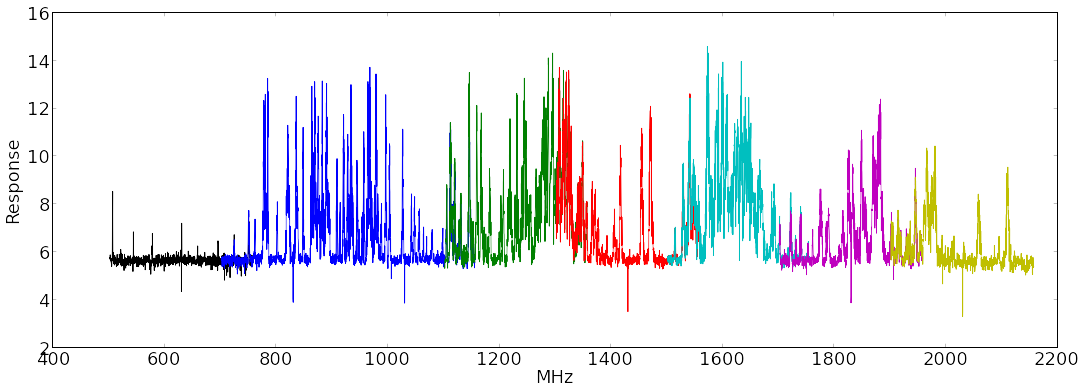

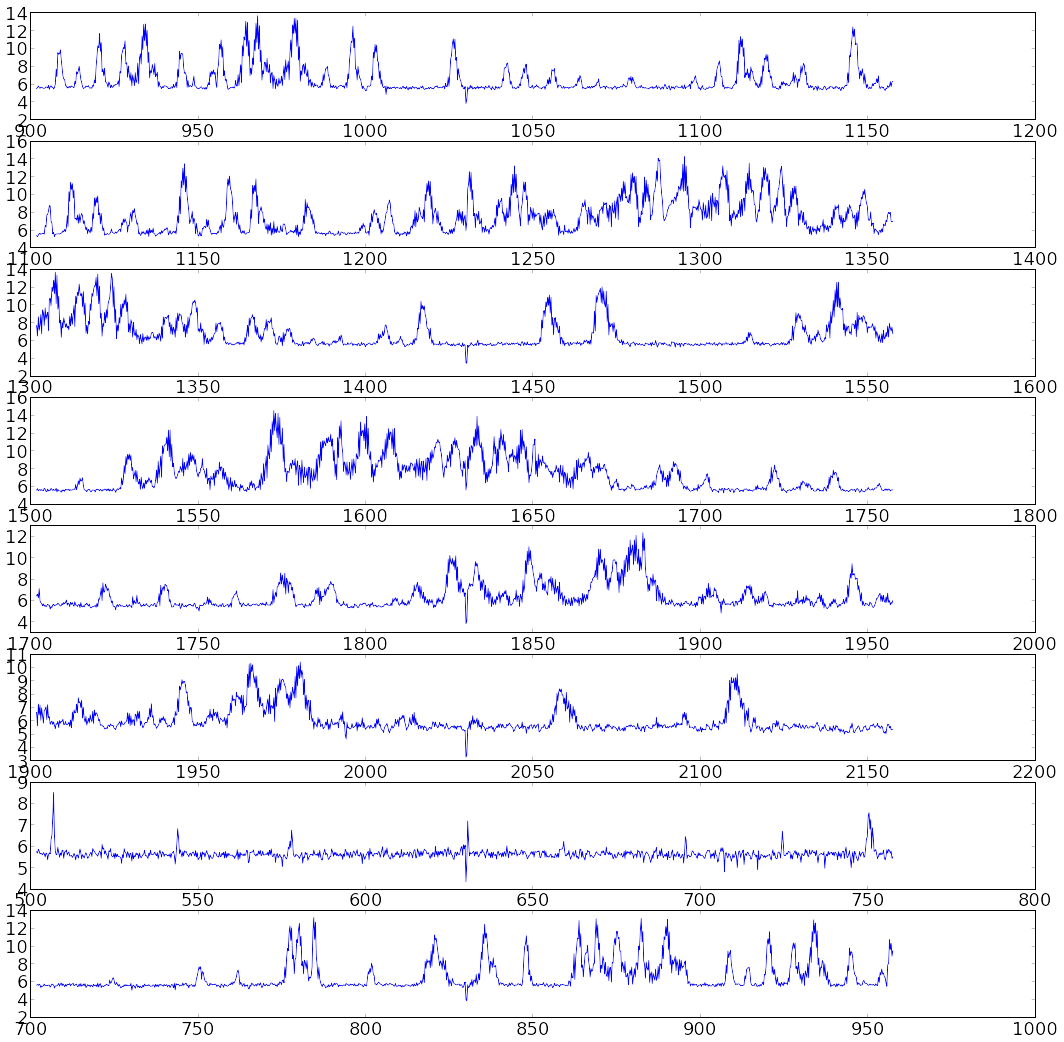

In [14]:
fig,ax = subplots(1,1,figsize=(18,6))
ax.set_xlabel('MHz')
ax.set_ylabel('Response')
fig2,axs = subplots(8,1,figsize=(18,18))
files = glob.glob('/data/detectors/2015-07-25-lo-*.npz')
files.sort()
x_3_11 = []
yr_3_11 = []
for k,fn in enumerate(files):
    ax2 = axs.flatten()[k]
    d = np.load(fn)
    fr = d['frqs']
    folds = d['folds']
    x = fr.reshape((-1,16)).mean(1)
    yr = folds.real.ptp(1).reshape((-1,16)).mean(1)
    ys = folds.real.std(1).reshape((-1,16)).mean(1)
    yi = folds.imag.ptp(1).reshape((-1,8)).mean(1)
    x_3_11.append(x)
    yr_3_11.append(yr)
    ax.plot(x,yr/ys)
#    ax.plot(x,yi)
    ax2.plot(x,yr/ys)

In [15]:
yr.shape

(1008,)

In [17]:
folds.shape

(16128, 256)

In [49]:
folds2 = folds - (np.median(folds.real,axis=1)+1j*np.median(folds.imag,axis=1))[:,None]

In [50]:
np.abs(folds2).max(1).argsort()[-100:]

array([5033, 4943, 4850, 4843, 4956, 5288, 5295, 4951, 5289, 4949, 4851,
       4958, 4955, 4954, 5290, 4960, 4947, 4948, 4946, 4975, 5032, 4950,
       5294, 4959, 4967, 4963, 4962, 4952, 4969, 4971, 4964, 5291, 5031,
       5293, 4973, 4976, 5292, 4966, 4957, 5030, 4965, 4979, 4953, 4968,
       4961, 5029, 4970, 4974, 4972, 5028, 4981, 4983, 4978, 4987, 5027,
       4977, 4990, 4980, 4988, 4982, 4992, 4984, 4991, 4994, 4986, 5025,
       5026, 4996, 4985, 5024, 4995, 4999, 4997, 4993, 5023, 5022, 5001,
       4998, 5003, 4989, 5000, 5021, 5005, 5020, 5004, 5002, 5007, 5019,
       5018, 5006, 5014, 5009, 5016, 5017, 5012, 5008, 5010, 5013, 5011,
       5015])

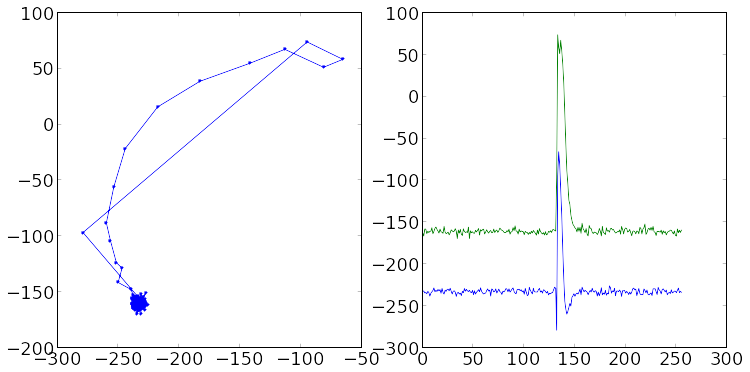

In [60]:
fig,(ax1,ax2)=subplots(1,2)
ax1.plot(folds.real[5017,:],folds.imag[5017,:],'.-')
ax2.plot(folds.real[5017,:])
ax2.plot(folds.imag[5017,:])


(-300.0, 100.0, -300.0, 300.0)

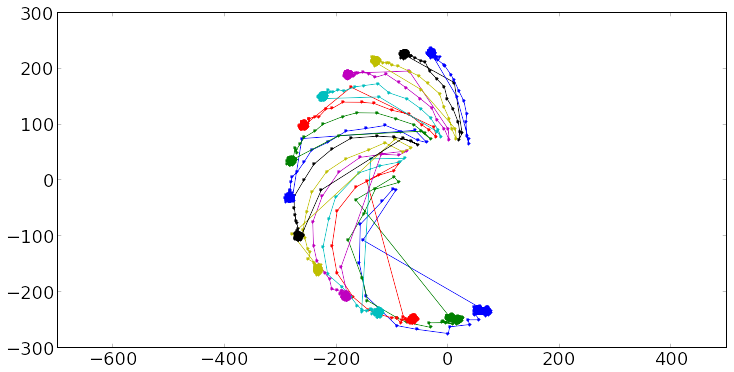

In [61]:
plot(folds.real[5007:5037:2,:].T,folds.imag[5007:5037:2,:].T,'.-')
axis('equal')

In [62]:
d = np.load('/data/detectors/2015-08-17-led-controller-full-sequence.npz')
print d.keys()

['frames', 'fold', 'lo', 'res']


In [63]:
fold = d['fold']

In [64]:
fold.shape

(32, 64, 32768)

In [65]:
fold2 = fold.reshape((32,64,-1,16)).mean(3)

In [66]:
fold2.shape

(32, 64, 2048)

In [73]:
fold3 = fold2.reshape((32,64,32,-1)).mean(1)

In [80]:
fab = np.abs(fold3 - (np.median(fold3.real,axis=2)+1j*np.median(fold3.imag,axis=2))[:,:,None])

In [74]:
fold3.shape

(32, 32, 64)

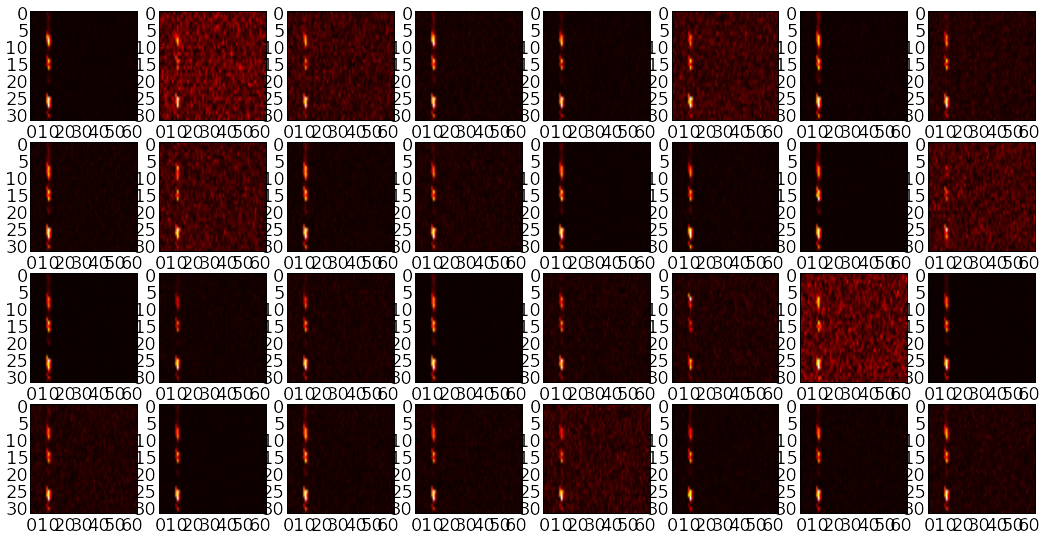

In [82]:
fig,axs = subplots(4,8,figsize=(18,9))
for k in range(32):
    ax = axs.flatten()[k]
    ax.imshow(np.roll(fab[k,:,:],10,axis=1),aspect='auto',cmap=cm.hot)

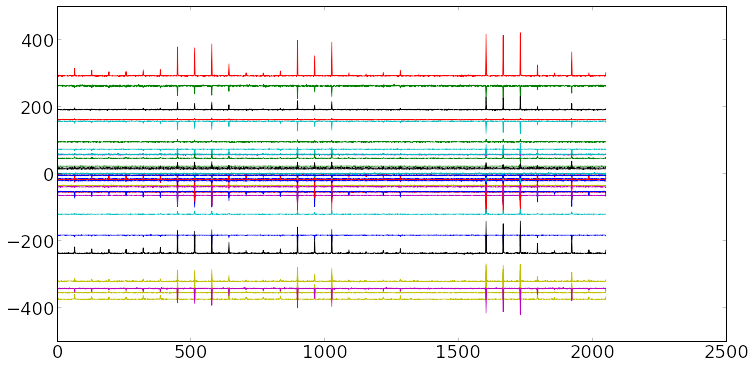

In [70]:
plot(fold2.mean(1).real.T)